## This notebook demonstrates the usage of SIDMpy, a python package to compute the central density of SIDM halos using a simple Jeans argument presented by Kaplinghat et al. 2016

In [1]:
from sidmpy.sidmpy import solve_from_NFW_params
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15

To start we'll assume a functional form for the SIDM cross section given by 

\begin{equation}
\sigma\left(v\right) = \sigma_0 \left(1 + \frac{v^2}{v_0^2}\right)^{-2}
\end{equation}

The name of the cross section implemented for this parameterization is TCHANNEL. In the above equation, the velocity $v$ is the relative speed of two SIDM particles, which we could reasonably equate with the central velocity dispersion of the SIDM halo. We don't know this a-priori, but we can compute it simultaneously with the central density of the isothermal part of the halo. Other cross section models currently implemented are POWER_LAW and VELOCITY_INDEPENDENT. 

In the cell below, we'll compute the central density of a cored halo $\rho_0$ using the prescription first described by Kaplinghat et al. 2016. We'll turn plotting on to visualize the solution space for the central density $\rho_0$ and 
the central velocity dispersion $\sigma_v$. The colors indicate the goodness of fit for combination of $\sigma_v$ and $\rho_0$. The solver will iterate until a solution is found with fit quality ~ 0.01, or one percent accuracy imposed on the boundary conditions for the SIDM halo profile (see Kaplinghat et al 2016).  

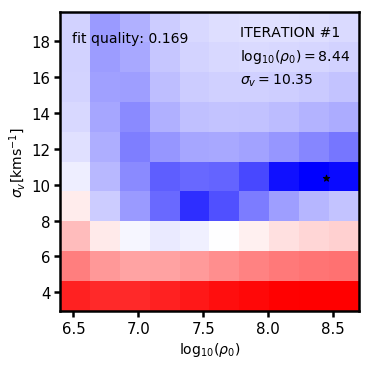

continue with next iteration... 1


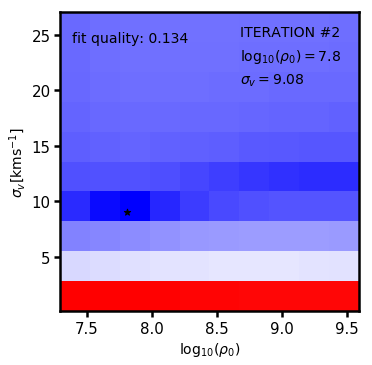

continue with next iteration... 1


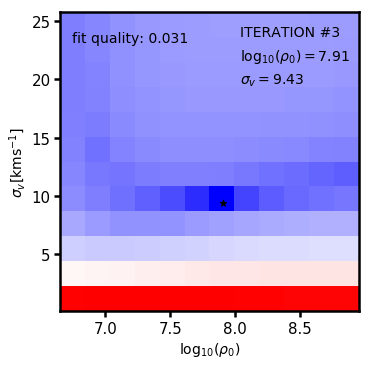

continue with next iteration... 1


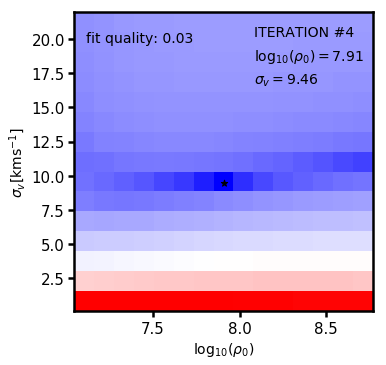

continue with next iteration... 1


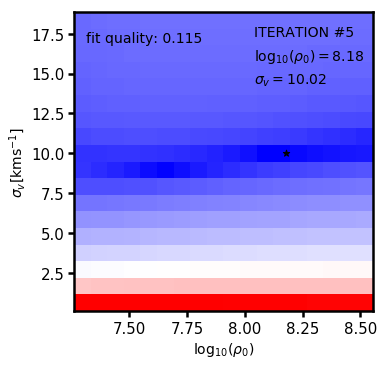

continue with next iteration... 1


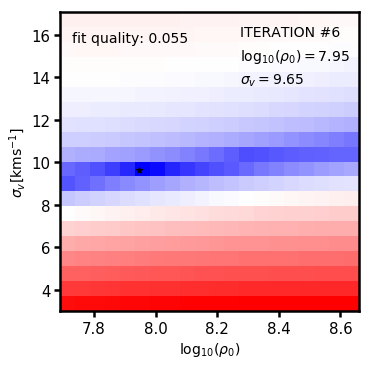

continue with next iteration... 1


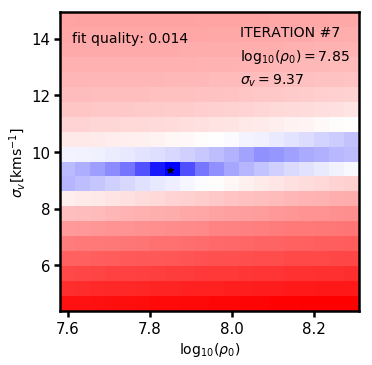

continue with next iteration... 1


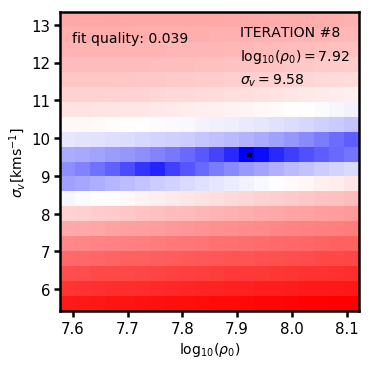

continue with next iteration... 1


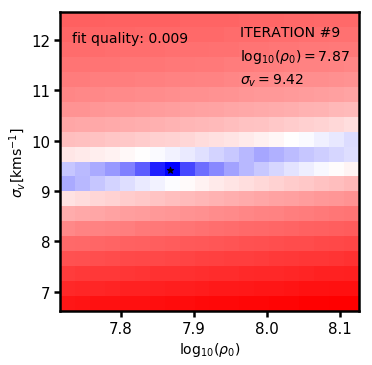

continue with next iteration... 1
solution found: 73788627.75611308 9.42438005853225


In [2]:
# specify the parameters describing an NFW halo: density normalization, scale radius, and the age of the halo
# units: M_sun / kpc^3, kpc, Gyr
rhos, rs, halo_age = 50062409, 0.617, 10.
cross_section_type = 'TCHANNEL'
# specify the normalization of the cross section at v_ref [cm^2/gram]
cross_norm = 6.
# specify the velocity dependence of the cross section 
v_dep = 0.8
v_ref = 30 
kwargs_cross_section = {'norm': cross_norm, 'v_ref': v_ref}
rho_core, velocity_dispersion, r_1 = solve_from_NFW_params(rhos, rs, halo_age, cross_section_type, kwargs_cross_section,
                                                     plot=True)
print('solution found:', rho_core, velocity_dispersion)

### Now we can plot the profile

We'll compare the isothermal solution to an NFW profile and a cored NFW profile

\begin{equation}
\rho\left(r, r_c, r_s\right) = \frac{\rho_s}{\left(x^a + \beta^a\right)^{\frac{1}{a}}\left(1+x\right)^2}
\end{equation}

where $\beta = \frac{r_c}{r_s} = \frac{\rho_0}{\rho_s}$ and $x = \frac{r}{r_s}$. The parameter $a$ sets how rapidly the profile transiations from cored to NFW-like. Larger values of $a$ seem to be better matches to the density profiels of SIDM halos in simulations, however, the only value for which analytic solutions exist for the deflection angle is $a=1$. Below, we'll set $a=10$. 

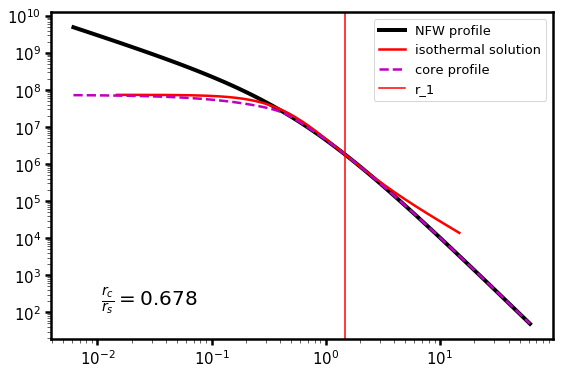

In [3]:
from sidmpy.Profiles.sidm_profile import SIDMprofile
from sidmpy.Profiles.nfw_like import TNFWprofile, coreTNFWprofile
import numpy as np

prof = SIDMprofile(rho_core, velocity_dispersion, r_1, rhos, rs, xmin=0.01, xmax=10)
#prof = SIDMprofile.fromNFWparams(rhos, rs, halo_age, cross_section_type, kwargs_cross_section, xmin=0.01, xmax=10)
r = np.logspace(-2, 2, 100) * rs
density_composite = prof(r, smooth=True, smooth_scale=0.1)

rt = 1e+6 * rs
rc = rhos * rs / rho_core
density_nfw = TNFWprofile(r, rhos, rs, rt)
density_isothermal = prof.rho_isothermal
density_approx = coreTNFWprofile(r, rhos, rs, rt, rc, a=10)
fig = plt.figure(1)
fig.set_size_inches(9,6)
plt.loglog(r, density_nfw, color='k', label='NFW profile', lw=4)
plt.loglog(prof.r_iso, prof.rho_isothermal, color='r', label='isothermal solution', lw=2.5)
#plt.loglog(r, density_composite, color='g', linestyle='--', label='composite profile', lw=4)
plt.loglog(r, density_approx, color='m', linestyle='--', label='core profile', lw=2.5)
plt.axvline(r_1, color='r', label='r_1')
plt.annotate(r'$\frac{r_c}{r_s} = $'+str(np.round(rc/rs, 3)), xy=(0.1, 0.1), xycoords='axes fraction', fontsize=20)
plt.legend(fontsize=13)


## Interpolated solutions

solutions for the central core density are pre-computed and saved for a subset of possible cross section models. They are accurate to within 30% at worst, but much faster to compute. 

In [4]:
from sidmpy.sidmpy import solve_with_interpolation
from sidmpy.sidmpy import solve_from_Mz

cross_section_type = 'TCHANNEL'
kwargs_cross_section = {'norm': 3., 'v_ref': 30.}
concentration_offset_from_median = 0. # in dex
rho0_from_interp = solve_with_interpolation(10 ** 7.5, 0.6, concentration_offset_from_median, cross_section_type, kwargs_cross_section)
rho0_exact_solution = solve_from_Mz(10**7.5, 0.6, cross_section_type, kwargs_cross_section)[0]
print(rho0_from_interp/rho0_exact_solution)

1.0920568512720519
